<a href="https://colab.research.google.com/github/KacperGrodecki/nieruchomosci-mazowieckie/blob/0.0.4/mazowieckie_colab_rysunki_i_analiza_wczytanie_pliku.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.metrics import confusion_matrix
from sklearn import svm
import pandas as pd
import numpy as np
np.random.seed(7)
from google.colab import drive
import seaborn as sns
drive.mount('/content/drive')
import matplotlib.pyplot as plt
import pandas as pd
#from otoDomScraper import daneDomu
#from random import randrange
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import statistics
from sklearn.cluster import AffinityPropagation
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.decomposition import FastICA
from sklearn import preprocessing
from IPython.display import Javascript
import requests
from collections import OrderedDict
import seaborn as sns

Mounted at /content/drive


In [2]:
filename='/content/drive/My Drive/domymazowieckie/dfMazowieckie_final.json'

In [18]:
final=pd.read_csv(filename,index_col=0)

In [19]:
final.head()

,lPokoi,rodzajZabudowy,materialBudynku,stanWykonczenia,okna,rynek,powierzchnia_corr,powierzchniaDzialki_corr,rokBudowy_corr,cena/m,lPieter_crr,locationX,locationY
0,6,wolnostojący,cegła,do wykończenia,0,wtórny,320.00,1000,2019,6062.503125,1,21.223696,52.245856
1,5,0,beton komórkowy,do wykończenia,plastikowe,pierwotny,154.00,750,2021,5186.363636,0,20.665400,52.124300
2,3,wolnostojący,0,do remontu,0,wtórny,80.00,2356,1950,5612.500000,1,20.683333,52.433333
3,4,bliźniak,silikat,do wykończenia,plastikowe,pierwotny,152.91,220,2022,4250.866523,1,21.016667,52.066667
4,4,wolnostojący,pustak,stan surowy otwarty,brak,pierwotny,106.00,960,2020,2924.528302,0,19.700000,52.550000


In [ ]:
from sklearn import preprocessing

In [ ]:
#plt.hist(final.loc[:,'lPokoi']/10)

In [ ]:
#sns.boxplot(x=(np.log(final["powierzchnia_corr"])/10))

In [ ]:
#sns.boxplot(x=(np.log(final["powierzchniaDzialki_corr"]+1)/14))

In [ ]:
#sns.boxplot(x=(np.power(final["rokBudowy_corr"]-1899,4)/3e8))

In [ ]:
#plt.hist(np.power(final["rokBudowy_corr"]-1899,4)/3e8)

In [ ]:
#sns.boxplot(x=final["cena/m"]/20000)

In [ ]:
#sns.boxplot(x=final["lPieter_crr"]/10)

In [ ]:
#plt.hist(final["lPieter_crr"]/10)

In [ ]:
#plt.hist((final["locationX"]-21)/4)

In [ ]:
#plt.hist((final["locationY"]-52)/2)

In [20]:
final=final[final['powierzchnia_corr']<500]
final=final[final['powierzchniaDzialki_corr']<5000]

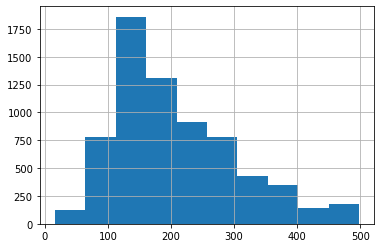

In [21]:
final['powierzchnia_corr'].hist()

In [22]:
final_plots=final.copy()

In [23]:
dummies = pd.get_dummies(final_plots, columns=['rodzajZabudowy', 'materialBudynku', 'stanWykonczenia', 'okna', 'rynek'])

In [24]:
from sklearn.cluster import KMeans

In [25]:
final_plots.head()

,lPokoi,rodzajZabudowy,materialBudynku,stanWykonczenia,okna,rynek,powierzchnia_corr,powierzchniaDzialki_corr,rokBudowy_corr,cena/m,lPieter_crr,locationX,locationY
0,6,wolnostojący,cegła,do wykończenia,0,wtórny,320.00,1000,2019,6062.503125,1,21.223696,52.245856
1,5,0,beton komórkowy,do wykończenia,plastikowe,pierwotny,154.00,750,2021,5186.363636,0,20.665400,52.124300
2,3,wolnostojący,0,do remontu,0,wtórny,80.00,2356,1950,5612.500000,1,20.683333,52.433333
3,4,bliźniak,silikat,do wykończenia,plastikowe,pierwotny,152.91,220,2022,4250.866523,1,21.016667,52.066667
4,4,wolnostojący,pustak,stan surowy otwarty,brak,pierwotny,106.00,960,2020,2924.528302,0,19.700000,52.550000


In [26]:
df=pd.DataFrame()

In [27]:
final_plots1=final_plots[['powierzchnia_corr','cena/m']].copy()#'lPokoi','lPieter_crr',,'powierzchniaDzialki_corr','rokBudowy_corr',,'locationX','locationY'
#df['lPokoi']=final_plots.loc[:,'lPokoi']/10
df["powierzchnia_corr"]=np.log(final_plots1["powierzchnia_corr"])/3-1
#df["powierzchniaDzialki_corr"]=np.log(final_plots["powierzchniaDzialki_corr"]+1)/14
#df["rokBudowy_corr"]=np.power(final_plots["rokBudowy_corr"]-1899,4)/3e8
df["cena/m"]=final_plots1["cena/m"]/20000
#df["locationX"]=(final_plots["locationX"]-21)/4
#df["locationY"]=(final_plots["locationY"]-52)/4
#df['lPieter_crr']=final_plots.loc[:,'lPieter_crr']/10

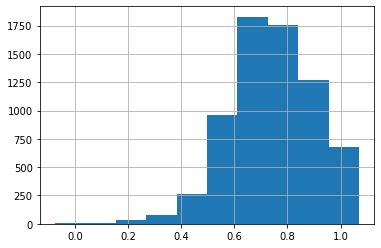

In [28]:
df["powierzchnia_corr"].hist()

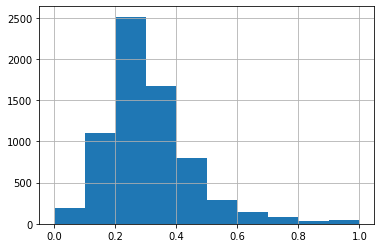

In [29]:
df["cena/m"].hist()

In [30]:
print(df.shape)
print(dummies.shape)

(6880, 2)
(6880, 37)


In [31]:
df.isna().sum()

powierzchnia_corr    0
cena/m               0
dtype: int64

In [ ]:
df.locationX=df.locationX.fillna(10)
df.locationY=df.locationY.fillna(40)

In [32]:
values=[]
for i in [2,3,4,5,6,7,8,9,10,11,12,13,14]:
  kmeans = KMeans(n_clusters=i, random_state=0).fit(df.values)
  values.append(kmeans.score(df.values))

In [33]:
print(np.abs(values))
print(values)

[200.18297377 132.29876426 107.25074474  89.4290725   74.94646292
  64.16967399  56.44781406  51.41940566  46.76053792  42.64103874
  39.14453588  36.70301572  34.14501046]
[-200.18297377327204, -132.29876426298787, -107.25074473565036, -89.42907250388276, -74.94646292375039, -64.16967399465645, -56.447814055581546, -51.41940566492758, -46.76053791761035, -42.64103873508732, -39.14453587500674, -36.703015721623956, -34.14501046229359]


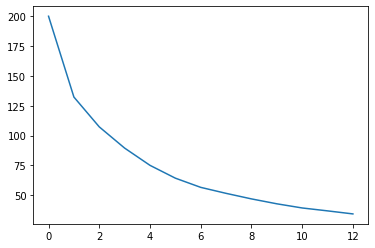

In [34]:
plt.plot(np.abs(values))

In [51]:
kmeans = KMeans(n_clusters=6, random_state=0).fit(df.values)


In [52]:
final_plots['kmean']=kmeans.predict(df.values)

In [53]:
final_plots.head(10)

,lPokoi,rodzajZabudowy,materialBudynku,stanWykonczenia,okna,rynek,powierzchnia_corr,powierzchniaDzialki_corr,rokBudowy_corr,cena/m,lPieter_crr,locationX,locationY,kmean,powierzchnia_cat
0,6,wolnostojący,cegła,do wykończenia,0,wtórny,320.00,1000,2019,6062.503125,1,21.223696,52.245856,0,6
1,5,0,beton komórkowy,do wykończenia,plastikowe,pierwotny,154.00,750,2021,5186.363636,0,20.665400,52.124300,4,3
2,3,wolnostojący,0,do remontu,0,wtórny,80.00,2356,1950,5612.500000,1,20.683333,52.433333,2,1
3,4,bliźniak,silikat,do wykończenia,plastikowe,pierwotny,152.91,220,2022,4250.866523,1,21.016667,52.066667,4,3
4,4,wolnostojący,pustak,stan surowy otwarty,brak,pierwotny,106.00,960,2020,2924.528302,0,19.700000,52.550000,2,2
5,6,wolnostojący,0,do zamieszkania,plastikowe,wtórny,160.00,2500,2011,8906.256250,1,20.625000,52.108889,1,3
7,4,wolnostojący,inne,do zamieszkania,0,wtórny,320.00,1400,1989,5312.503125,0,21.236944,52.135556,0,6
8,7,bliźniak,cegła,do zamieszkania,plastikowe,wtórny,266.00,465,2008,7142.860902,1,NaN,NaN,5,5
9,6,0,cegła,do wykończenia,0,pierwotny,270.00,900,2019,7407.414815,0,NaN,NaN,5,5
10,6,bliźniak,cegła,do zamieszkania,plastikowe,wtórny,204.63,545,2013,6597.278014,2,20.800000,52.166667,1,4


In [54]:
final_plots['powierzchnia_cat']=(final_plots['powierzchnia_corr']/50).astype(int)

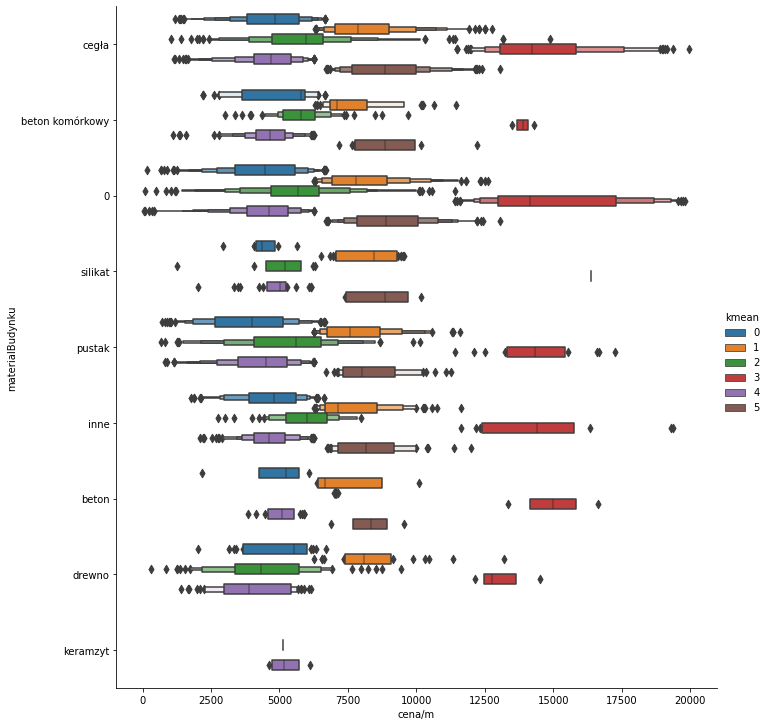

In [55]:
sns.catplot(y="materialBudynku", x="cena/m", hue="kmean", kind="boxen", data=final_plots,height=10)

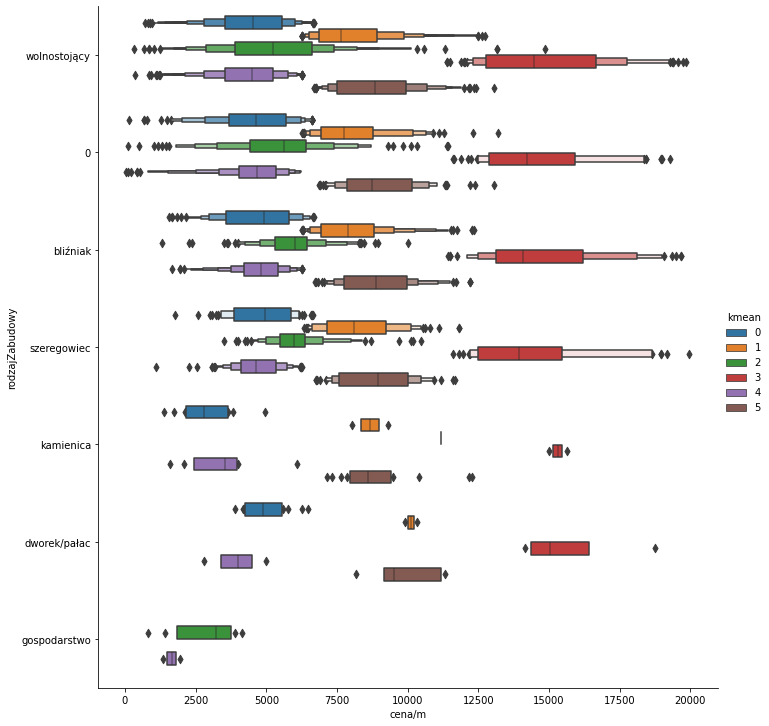

In [56]:
sns.catplot(y="rodzajZabudowy", x="cena/m", hue="kmean", kind="boxen", data=final_plots,height=10)

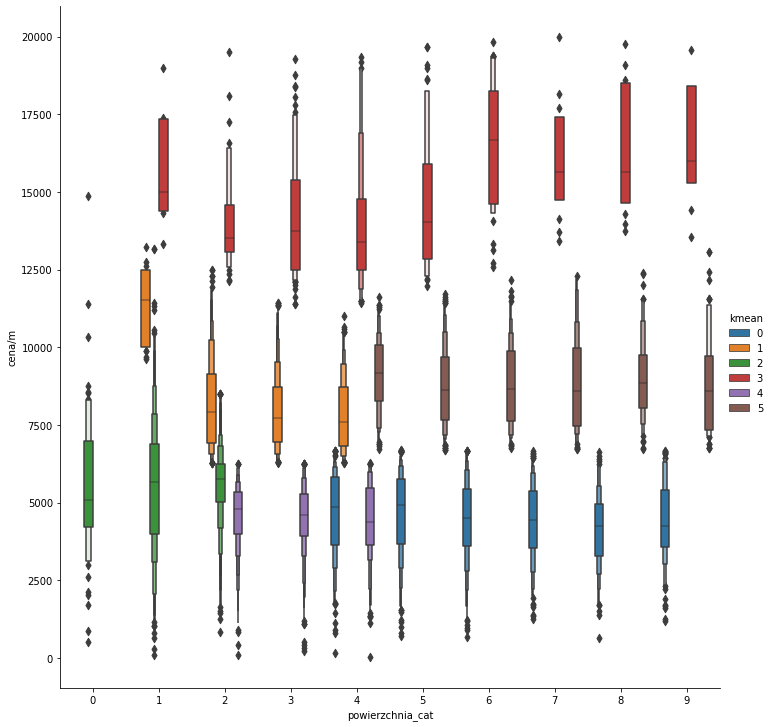

In [57]:
sns.catplot(x="powierzchnia_cat", y="cena/m", hue="kmean", kind="boxen", data=final_plots,height=10)

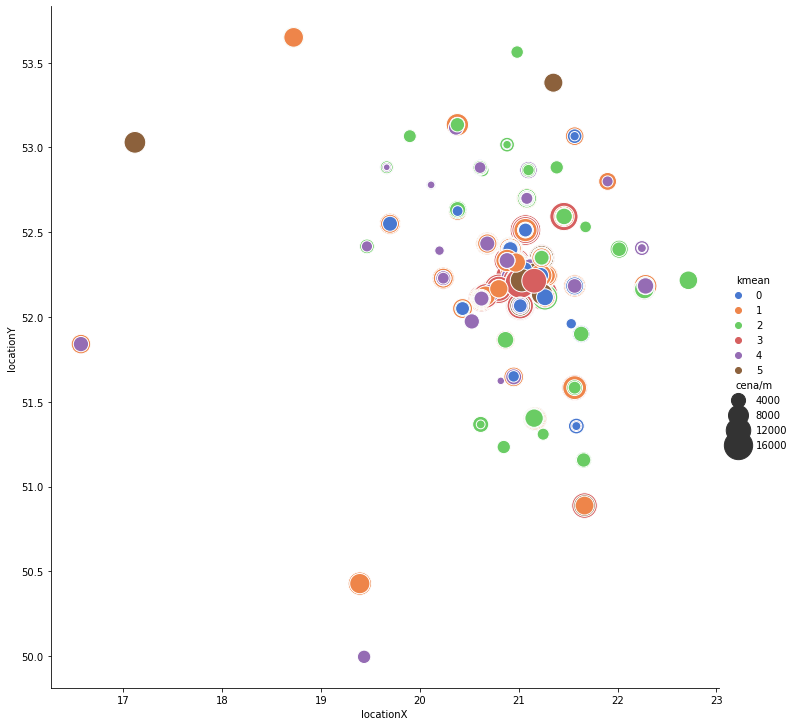

In [58]:
sns.relplot(y="locationY", x="locationX", hue="kmean", data=final_plots,size='cena/m',height=10, sizes=(1, 1000),palette="muted")

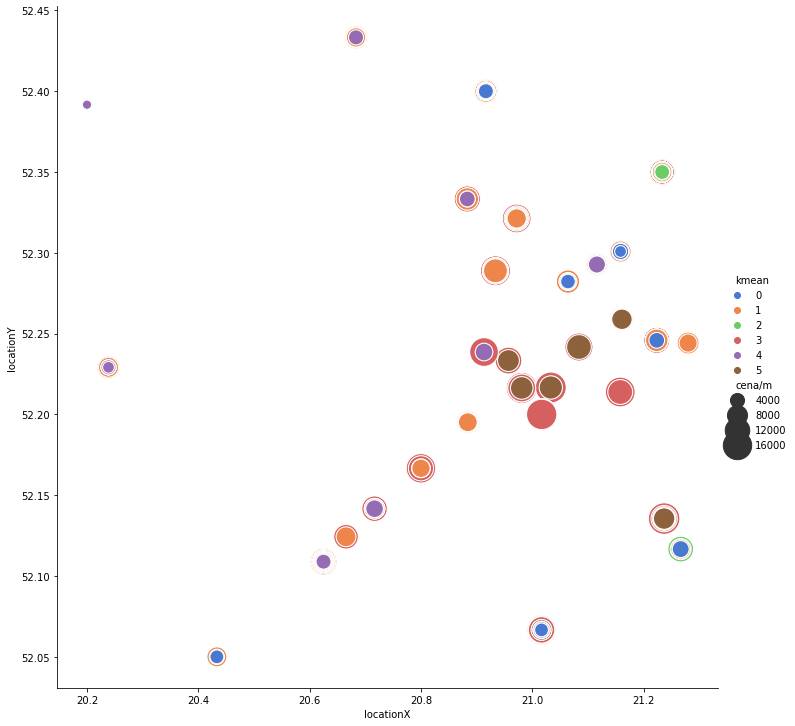

In [59]:
sns.relplot(y="locationY", x="locationX", hue="kmean", data=final_plots[(final_plots["locationX"]>20) & (final_plots["locationX"]<21.5)&
                                                                             (final_plots["locationY"]>52) & (final_plots["locationY"]<52.5)],size='cena/m',height=10, sizes=(1, 1000),palette="muted")